# Medidas de riesgo

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.thebluediamondgallery.com/wooden-tile/images/risk.jpg" width="450px" height="150px" />

> Existen $10^{11}$ estrellas en la galaxia. Ese solía ser un número grandísimo. Sin embargo son solo cien billones. Es menos que la deuda nacional! (de EUA) Solíamos llamarlos números astronómicos. Ahora, deberíamos llamarlos números económicos.

**Richard Feynman**

Referencias:
- www.risklab.es/es/seminarios/pasados/septiembre2005.pdf
- www.emagister.com/uploads_user_home/Comunidad_Emagister_5840_valor.pdf
- repositorio.uchile.cl/bitstream/handle/2250/127411/149%20Medidas_de_Riesgo_Financiero_Rafael_Romero_M.pdf

In [48]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.neighbors import KernelDensity
import datetime
from datetime import datetime
import scipy.stats as st
import scipy as sp
import scipy.optimize as scopt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#algunas opciones para Python
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.YahooDailyReader(ticker, start_date, end_date).read().sort_index('major_axis')
#     closes = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date).read()
#     index = pd.to_datetime(closes.loc['date',:,tickers[0]].values)
#     closes.set_axis(index, axis=1, inplace=True)
#     closes = closes.loc['adjclose']#.sort_index().dropna()
#     closes = pd.DataFrame(np.array(closes.as_matrix(), dtype=np.float64), columns=ticker, index=closes.index)
#     closes.index.name = 'Date'
    return closes.loc['Adj Close'].dropna()

####### Calculation of log-returns
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()

## 0. Introducción y apuntes históricos

Existen en el mundo factores fundamentales que han contribuido al desarrollo de la gestión, medición, y el control del riesgo financiero:

- Alto nivel de inestabilidad económica en los mercados.
 - Fundamentalmente la volatilidad se ve reflejada, en los siguientes factores: La volatilidad de los mercados accionarios, la volatilidad de la tasa de cambio, la volatilidad de la tasa de interés y la volatilidad de los precios en el mercado de los commodities.

- Crecimiento de las actividades de negociación. 
 - Durante los últimos años, tanto el número de activos negociados como el volumen de éstos, ha tenido un incremento considerable a nivel mundial. Se ha evolucionado considerablemente en el desarrollo de numerosos tipos de instrumentos, los cuales han facilitado las transacciones sobre activos previamente ilíquidos. Los mercados de derivados financieros como las opciones, futuros, forwards y swaps, han tenido un crecimiento notable a partir de los años 70, cuando hubo un importante desarrollo de sus aspectos teóricos, liderado por autores como Robert Merton, Fisher Black, Myron Scholes.

- Avances en la tecnología.
 - Mejor poder computacional, mejores técnicas computacionales. Se ha avanzado en la cultura de la información, ya que las empresas han comenzado a tomar conciencia acerca de la importancia de tener bases de datos, esenciales para un posterior análisis del riesgo. Estos avances tecnológicos permiten obtener, de forma rápida, información fundamental para la toma de decisiones de inversión.
___

### Conceptos básicos relativos al riesgo

- Etimológicamente la palabra riesgo deriva del italiano risico o rischio, y éste a la vez del árabe risq, que significa ”lo que depara la providencia”. 

- La palabra riesgo puede entenderse como la contingencia o proximidad a un daño; es decir, tiene que **ver con el futuro**, con la necesidad de prever y anticiparnos antes de cierta contingencia.

- En el contexto de las finanzas, cuando hablamos de riesgo nos estamos refiriendo a la **posibilidad de pérdida o ganancia** debido a los cambios sobre los factores que afectan el valor de un activo. Por esa razón, es importante que se identifiquen, se midan, se controlen, y se haga un **monitoreo** de los diversos tipos de riesgo a los que están expuestos los inversores en los mercados de capitales.

- Por lo general, el riesgo se percibe como una exposición a eventos negativos; no obstante, el riesgo bien manejado representa una gran oportunidad de obtener rentabilidades significativas en los portafolios financieros. En este sentido, y con una visión positiva, el riesgo financiero es más considerado como una _“oportunidad de ganar”_ que como una “posibilidad de perder”.
___

### Tipos de riesgos financieros

1.**Riesgo de mercado**, asociado a las fluctuaciones de los mercados financieros, y en el que se distinguen:
 - Riesgo de cambio, consecuencia de la volatilidad del mercado de divisas.
 - Riesgo de tipo de interés, consecuencia de la volatilidad de los tipos de interés.
 - Riesgo de mercado (en acepción restringida), que se refiere específicamente a la volatilidad de los mercados de instrumentos financieros tales como acciones, deuda, derivados, etc.
   
2.**Riesgo de crédito**, consecuencia de la posibilidad de que una de las partes de un contrato financiero no asuma sus obligaciones.

3.**Riesgo de liquidez o de financiación**, y que se refiere al hecho de que una de las partes de un contrato financiero no pueda obtener la liquidez necesaria para asumir sus obligaciones a pesar de disponer de los activos —que no puede vender con la suficiente rapidez y al precio adecuado— y la voluntad de hacerlo.

4.**Riesgo operativo**, que es entendido como la posibilidad de ocurrencia de pérdidas financieras, originadas por fallas o insuficiencias de procesos, personas, sistemas internos, tecnología, y en la presencia de eventos externos imprevistos.

5.**Riesgo país o riesgo soberano**, es todo riesgo inherente a operaciones transnacionales y, en particular, a las financiaciones desde un país a otro.

6.**Riesgo sistémico**, puede ser interpretado como "inestabilidad del sistema financiero, potencialmente catastrófico, causado por eventos idiosincráticos o condiciones en los intermediarios financieros".

> Referencia:https://es.wikipedia.org/wiki/Riesgo_financiero

### Apuntes históricos

Históricamente se pueden identificar tres periodos relevantes en cuanto al desarrollo de las finanzas modernas:

1. **Modelo de media-varianza (Markowitz, 1952-1956)**
 - Antes de esto el riesgo financiero era considerado como un *factor de corrección* entre el retorno esperado de una inversión y el retorno real. De modo que no se podía definir el "riesgo" sino hasta que se tenía el resultado de la decisión de inversión. Markowitz propuso como medidas de riesgo la varianza (para inversiones individuales) y la covarianza (para portafolios). Con esta forma de medir el riesgo se pudo optimizar...
 $$P \ \text{(Portafolio->Retornos normales)}\\
 Var(P) = \sigma^2=x_1^2\sigma_1^2 +2x_1x_2 \sigma_{12}+ x_2^2 \sigma_2^2$$


2. **Modelos en tiempo continuo (Merton, Black, Scholes, 1969-1973)**
 - Estos modelos fueron un gran paso teórico que se evidenciaron prácticamente con la introducción de los instrumentos derivados, puesto que permitieron su valuación.
 
3. **Medidas de riesgo (Artzner, 1997-1999)**
 - Desarrollos que pretenden modelar situaciones más reales como sesgo, colas anchas, etcétera.

___
Supongamos que tenemos un portafolio de acciones. ¿Qué tan riesgosa es esa inversión?

**Objetivo:** producir un único numero para resumir la exposición de la inversión al riesgo de mercado.

- Pregunta inicial: ¿Cuánto podría perder en el peor escenario?
- Mala pregunta: lo podrías perder todo.

Bueno, pero

- ¿Cuál es la pérdida que estamos $100\alpha \%$ confiados que no excederemos en $T$ tiempo?

Ejemplo:

$VaR_{0.9}=1000.000$ en 10 días:
- Estoy 90% seguro que no perderé más de $1000.000$ en mi inversión en los siguientes 10 días.
- Hay un 90% de probabilidad que mi pérdida sea menor a $1000.000$ en los siguientes 10 días.
- Hay un 10% de probabilidad que mi pérdida sea mayor a $1000.000$ en los siguientes 10 días.

## 1. Value-at-Risk (VaR)

Dado un horizonte temporal $T$ y un nivel de confianza $100 \alpha \%$, el **VaR** es la pérdida máxima respecto al rendimiento esperado sobre el horizonte temporal $T$ que sólo es superada con una probabilidad $1 − \alpha$.


$$ VaR = \mu - \alpha$$

donde $\mu$ es el retorno medio, $\alpha$ es el menor valor tal que a la izquierda de ese valor la probabilidad este en cierto nivel, por ejemplo 1%.
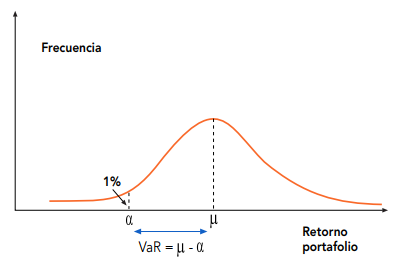

### Ejemplo:

Suponga que el retorno de cada uno de los dos activos que forman el portafolio se distribuye normal. Un activo tiene un retorno esperado de 20% y el otro de 15%. La varianza del primer activo es 0,08, la del segundo es 0,05 y la covarianza es 0,02. La ponderación de cada activo es la misma.

El retorno esperado del portafolio es:
$$\mu = {1 \over 2} 0.20+{1 \over 2}0.15 =0.175$$

La varianza del portafolio es:
$$\sigma^2 = {1 \over 2}^2 0.08 +{1 \over 2}^2 0.05 + 2{1 \over 2}{1 \over 2} 0.02 = 0.043$$
$$ \sigma = \sqrt 0.043 = 0.206$$

¿Cómo definir $\alpha$?

Se debe de tomar un significancia que oscila tipicamente entre el 1%,5% o 10%. Luego se debe de encontrar el valor de la variable aleatoria tal que a la izquierda de ese valor, quede el nivel de significancia tomado. Por ejemplo si se toma un nivel de significancia del 1%, $\alpha se encuentra como:

In [50]:
alpha = st.norm.ppf(0.01,loc=0.175,scale=0.206)
alpha

-0.30422766205241319

Finalmente se encuentra que:
$$VaR = 0.175 +0.305=0.48$$

Que se interpreta como que hay un 1% de probabilidad de perder más que 48% en el próximo período.

## Parte práctica

Descargamos precios de cierre de activos correspondientes a American Airlines y a Coca-Cola, entre 2010 y 2017

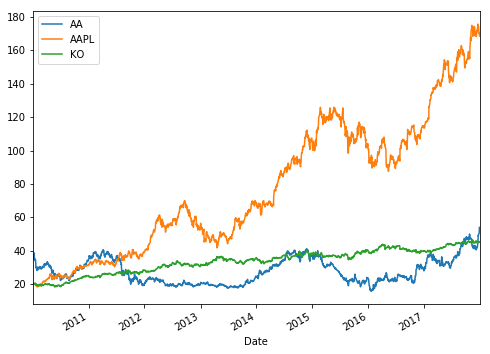

In [3]:
ticker = ['AA', 'KO','AAPL']
start_date = '2010-01-01'
end_date = '2017-12-31'
closes = get_historical_closes(ticker, start_date, end_date)
closes.plot(figsize=(8,6));

Calculamos rendimientos...

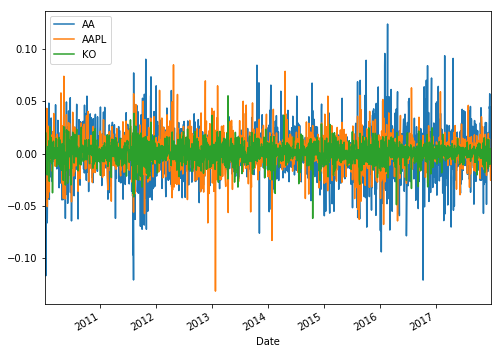

In [4]:
daily_ret = calc_daily_ret(closes)
daily_ret.plot(figsize=(8,6));

Definimos un portafolio con las anteriores acciones. Tomemos igual participación en ambas...

In [5]:
def def_portfolio(tickers, participation=None):
    if (participation is None):
        participation = np.ones(len(tickers))/len(tickers)    
    portfolio = pd.DataFrame({'Tickers': tickers, 'Participation': participation}, index=tickers)
    return portfolio

In [6]:
portfolio = def_portfolio(ticker, participation=[1,1,1])
portfolio

,Participation,Tickers
AA,1,AA
KO,1,KO
AAPL,1,AAPL


Con la información podemos calcular rendimientos anuales, o mensuales

In [7]:
def calc_annual_ret(daily_ret):
    return np.exp(daily_ret.groupby(lambda date: date.year).sum())-1
def calc_monthly_ret(daily_ret):
    return np.exp(daily_ret.groupby(lambda date: '%4d-%02d'%(date.year,date.month)).sum())-1

# Ejemplificar el funcionamiento de la función
# daily_ret.groupby(lambda date: date.year).sum()
# daily_ret.index.year

In [8]:
annual_ret = calc_annual_ret(daily_ret)
monthly_ret = calc_monthly_ret(daily_ret)

Graficar...

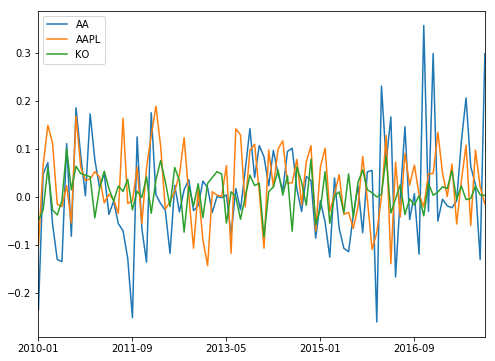

In [9]:
monthly_ret.plot(figsize=(8,6));

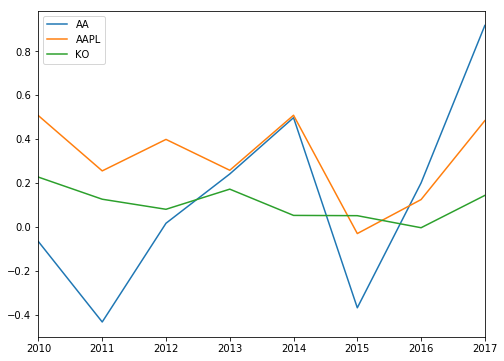

In [10]:
annual_ret.plot(figsize=(8,6));

Calculamos el rendimiento ponderado del portafolio (mensual)

In [39]:
def calc_portfolio_ret(portfolio, returns, name='Value'):
    total_sum = portfolio.Participation.sum()
    weight = portfolio.Participation/total_sum
    weighted_ret = returns*weight
    return pd.DataFrame({name: weighted_ret.sum(axis=1)})

# Explicación de los comandos
# p = portfolio.Participation/3
# w=(monthly_ret*p)#.sum(axis=1)
# monthly_ret,w

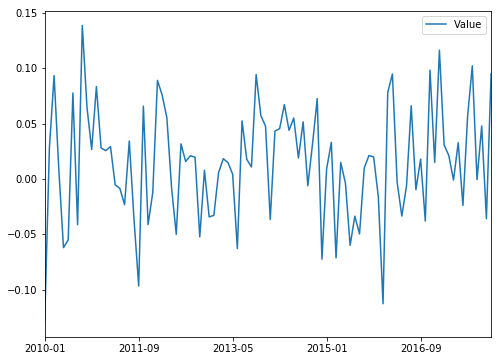

In [12]:
portfolio_ret_m = calc_portfolio_ret(portfolio, monthly_ret)
portfolio_ret_m.plot(figsize=(8,6));

### Métodos para estimar el VaR

**Con datos históricos**

Calculamos cuantiles empíricos de un histograma de rendimientos (diarios, semanales, en periodos de N días, mensuales, anuales).

Como ejemplo, tomamos los rendimientos mensuales del portafolio.

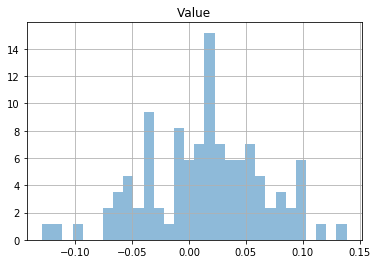

In [13]:
portfolio_ret_m.hist(bins=30, normed=True, histtype='stepfilled', alpha=0.5);

El cuantil empírico 0.01 de los retornos mensuales del portafolio, menos el retorno mensual esperado ($VaR_{0.99}$ a un mes) es:

In [14]:
portfolio_ret_m.mean().Value-portfolio_ret_m.quantile(0.01).Value

0.12781667098480015

Esto quiere decir que con un $99\%$ de confianza, la peor pérdida mensual del portafolio no será mayor a $12.78\%$.

> ## **Ejercicio** 
> Calcular el $VaR_{0.95}$ a un año.

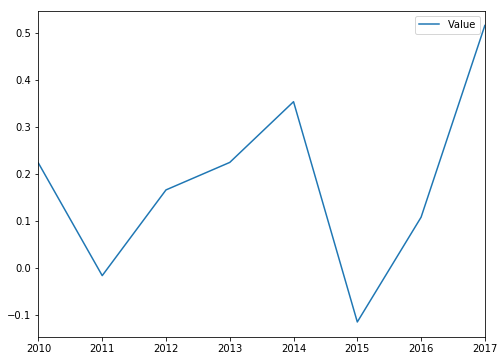

In [15]:
portfolio_ret_a = calc_portfolio_ret(portfolio, annual_ret)
portfolio_ret_a.plot(figsize=(8,6));

In [16]:
portfolio_ret_a.mean().Value-portfolio_ret_a.quantile(0.05).Value

0.26312820267254211

En un año, la máxima pérdida podría ser de $26.31\%$ con una confianza del $95\%$.

**Usando métodos Monte Carlo**

Simulamos varios escenarios con condiciones aleatorias de mercado. Calculamos la pérdida para cada escenario. Usamos los datos de los escenarios para establecer el riesgo del portafolio.

Ajustamos una función de densidad empírica con Kernel Gaussianos

In [17]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.001).fit(portfolio_ret_m)

Interpretación de `bandwidth`
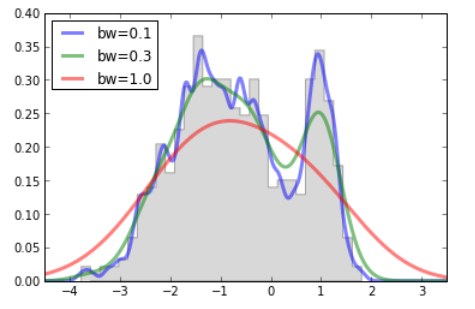

Simulamos varios escenarios de rendimientos...

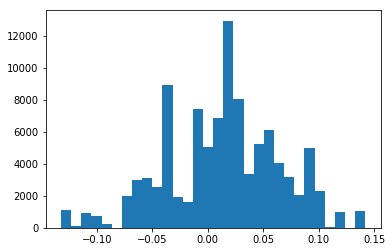

In [18]:
nscen = 100000
ret_sim = kde.sample(n_samples=nscen, random_state=None)
plt.hist(ret_sim, bins=30);

Obtenemos el cuantil 0.01 de los retornos simulados del portafolio, menos el retorno mensual esperado ($VaR_{0.99}$ a un mes) es:

In [19]:
np.mean(ret_sim)-np.percentile(ret_sim, 1)

0.14189336543190412

Esto quiere decir que con un $99\%$ de confianza, la peor pérdida mensual del portafolio no será mayor a $14.19\%$.

**Ejercicio** Calcular el $VaR_{0.95}$ a un año.

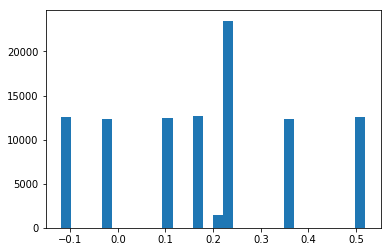

In [20]:
kde_a = KernelDensity(kernel='gaussian', bandwidth=0.001).fit(portfolio_ret_a)
nscen = 100000
ret_sim = kde_a.sample(n_samples=nscen, random_state=None)
plt.hist(ret_sim, bins=30);

In [21]:
np.mean(ret_sim)-np.percentile(ret_sim, 5)

0.29802912816473198

En un año, la máxima pérdida podría ser de $29.8\%$ con una confianza del $95\%$.

## 2. Deficiencia del VaR como medida de riesgo

Matemáticamente:

- Una medida de riesgo es una función que cuantifica riesgo (como el VaR)


- Una medida de riesgo determina la cantidad de un capital que debe ser reservada. El objetivo de esta reserva es garantizar la presencia de capital que pueda cubrir la manifestación de un evento riesgoso que produzca una pérdida (crédito).

- Desde un punto de vista matemático, una medida de riesgo es una función $\rho:\mathcal{L}\to\mathbb{R}\cup\lbrace\infty\rbrace$, donde $\mathcal{L}$ es el espacio lineal de pérdidas.

### Coherencia

Una medida de riesgo se dice coherente si:

1. Es **monótona**: $Z_1,Z_2\in\mathcal{L}$, $Z_1\leq Z_2$ entonces $\rho(Z_1)\leq\rho(Z_2)$. Implica que hay posibilidad de un ordenamiento (riesgo mayor asociado a mayor pérdida o beneficio).
2. Es **subaditiva**: $Z_1,Z_2\in\mathcal{L}$ entonces $\rho(Z_1+Z_2)\leq\rho(Z_1)+\rho(Z_2)$. Implica que hay un incentivo a la diversificación.
3. Es **positivamente homogenea**: $a\geq 0$, $Z\in\mathcal{L}$ entonces $\rho(aZ)=a\rho(Z)$. Implica proporcionalidad del riesgo.
4. Es **translacionalmente invariante**: $b\in\mathbb{R}$, $Z\in\mathcal{L}$ entonces $\rho(Z+b)=\rho(Z)-b$. Implica que por el hecho de agregar retornos por valor seguro $b$ a un retorno aleatorio x el riesgo $\rho$ decrece por un factor de $b$.

A parte de la implicación financiera de la subaditividad, esta condición está fuertemente relacionada con la convexidad (propiedad de prioritaria en optimización). 

**El VaR falla, en general, en la subaditividad.**

## 3. (Co)Varianza como medida de riesgo.

El riesgo no son solo eventos de pérdida. De hecho, como dijimos antes, el riesgo es una oportunidad para ganar. El riesgo finalmente esta asociado con *no saber*.

Dado que los portafolios son funciones lineales de activos, la covarianza es convexa (en particular subaditiva), lo cual es esencial en la teoría de Markowitz.

Veamos un ejemplo con los datos que tenemos...

Covarianza y correlacion de los activos

In [22]:
monthly_ret.cov()

,AA,AAPL,KO
AA,1.194e-02,1.526e-03,3.123e-04
AAPL,1.526e-03,5.354e-03,7.659e-04
KO,3.123e-04,7.659e-04,1.437e-03


In [23]:
monthly_ret.corr()

,AA,AAPL,KO
AA,1.000,0.191,0.075
AAPL,0.191,1.000,0.276
KO,0.075,0.276,1.000


Concatenamos con portafolio y calculamos varianzas individuales...

In [24]:
total_ret = pd.concat([monthly_ret, portfolio_ret_m], axis=1)
total_ret

,AA,AAPL,KO,Value
2010-01,-0.235,-0.103,-0.049,-1.290e-01
2010-02,0.047,0.065,-0.028,2.809e-02
2010-03,0.071,0.148,0.060,9.320e-02
2010-04,-0.057,0.111,-0.028,8.652e-03
2010-05,-0.131,-0.016,-0.038,-6.190e-02
...,...,...,...,...
2017-08,0.205,0.107,-0.006,1.021e-01
2017-09,0.062,-0.060,-0.004,-5.978e-04
2017-10,0.025,0.097,0.022,4.775e-02
2017-11,-0.131,0.020,0.004,-3.578e-02


In [25]:
total_ret.std()**2

AA       0.012
AAPL     0.005
KO       0.001
Value    0.003
dtype: float64

Verificación subaditividad

In [41]:
(total_ret.std()**2).Value<=(total_ret.std()**2).AA+(total_ret.std()**2).KO \
                            +(total_ret.std()**2).AAPL

True

Gráfica

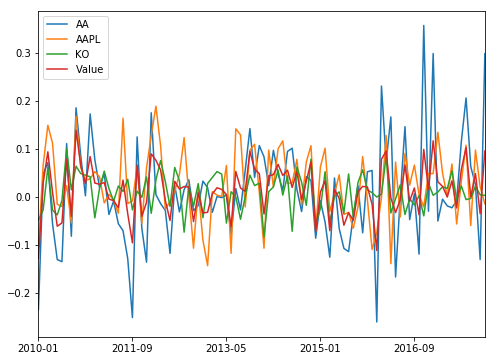

In [42]:
total_ret.plot(figsize=(8,6));

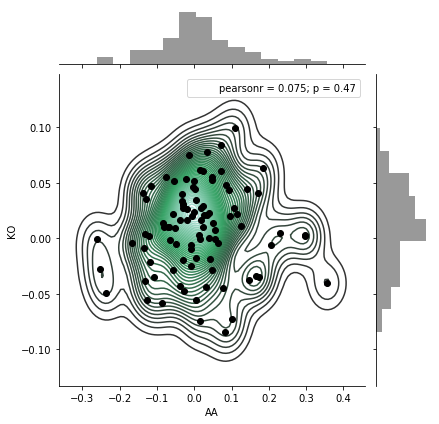

In [28]:
sns.jointplot('AA', 'KO', data=monthly_ret, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

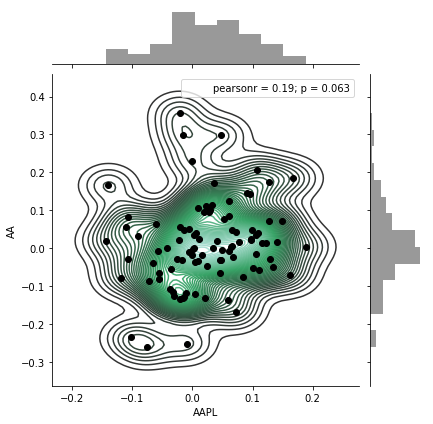

In [46]:
sns.jointplot('AAPL','AA', data=monthly_ret, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

Beneficia mucho: correlación negativa o en su defecto cercana a cero.

**Ejemplo**: considere los activos con los siguientes rendimientos y un portafolio de igual participación.

In [29]:
rendimientos = pd.DataFrame({'Acción A': [0.1, 0.24, 0.05, -0.02, 0.2],
                             'Acción B': [-0.15, -0.2, -0.01, 0.04, -0.15]})
rendimientos

,Acción A,Acción B
0,0.10,-0.15
1,0.24,-0.20
2,0.05,-0.01
3,-0.02,0.04
4,0.20,-0.15


In [30]:
portafolio = def_portfolio(['Acción A', 'Acción B'])
portafolio

,Participation,Tickers
Acción A,0.5,Acción A
Acción B,0.5,Acción B


In [31]:
rendimientos_port = calc_portfolio_ret(portafolio, rendimientos)
rendimientos_port

,Value
0,-0.025
1,0.020
2,0.020
3,0.010
4,0.025


In [32]:
rendimientos_totales = pd.concat([rendimientos, rendimientos_port], axis=1)

In [33]:
rendimientos.cov()

,Acción A,Acción B
Acción A,0.011,-0.010
Acción B,-0.010,0.011


In [34]:
rendimientos.corr()

,Acción A,Acción B
Acción A,1.000,-0.926
Acción B,-0.926,1.000


In [35]:
rendimientos_totales.std()**2

Acción A    1.138e-02
Acción B    1.063e-02
Value       4.125e-04
dtype: float64

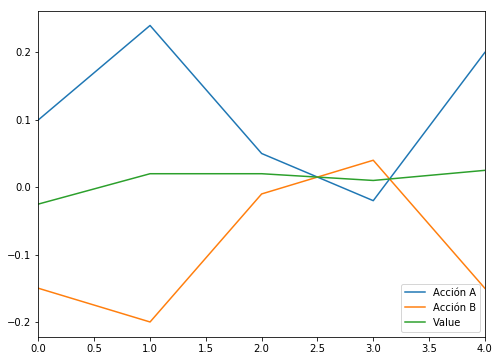

In [36]:
rendimientos_totales.plot(figsize=(8,6));

## Tarea

Consultar la medida CVaR (VaR condicional). Dar una breve descripción usando LaTeX en celdas Markdown.

Además, implementar en python, tomar como ejemplo un par de activos y verificar subaditividad.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>